<a href="https://colab.research.google.com/github/tran0467/User-behaviour-analysis/blob/main/Data_Analysis_(numeric).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from scipy.stats import kendalltau, pearsonr, spearmanr
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn.linear_model import LinearRegression
%matplotlib inline     
sns.set(color_codes=True)
%load_ext google.colab.data_table

def kendall_pval(x,y):
  return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
  return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
  return spearmanr(x,y)[1]

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
# First-Second value features against First Value Health Profile
pathGeneral = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/General_Feature_with_Spent_Time.csv"
dfGeneral = pd.read_csv(pathGeneral)
display(dfGeneral)
pathDiffFirstSecond = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/Diff_Direction_first_second_value.csv"
dfDiffFirstSecond = pd.read_csv(pathDiffFirstSecond)
display(dfDiffFirstSecond)
pathDiffFirstLast = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/Diff_Direction_first_last_value.csv"
dfDiffFirstLast = pd.read_csv(pathDiffFirstLast)
display(dfDiffFirstLast)
pathProfileFirst = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/dfHealthProfile_FirstValue.csv"
dfProfileFirst = pd.read_csv(pathProfileFirst)
display(dfProfileFirst)
pathProfileLast = "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/dfHealthProfile_LastValue.csv"
dfProfileLast = pd.read_csv(pathProfileLast)
display(dfProfileLast)

Unnamed: 0  ... Contraception time spent
0             15  ...                  47272.0
1             20  ...                    736.0
2             23  ...                  15052.0
3             24  ...                   3538.0
4             25  ...                   5560.0
...          ...  ...                      ...
3750        4125  ...                      0.0
3751        4126  ...                      NaN
3752        4127  ...                      0.0
3753        4128  ...                      NaN
3754        4129  ...                      0.0

[3755 rows x 47 columns]

Unnamed: 0  ... Contraception Direction
0              0  ...                     0.0
1              1  ...                     0.0
2              2  ...                     0.0
3              3  ...                     0.0
4              4  ...                     0.0
...          ...  ...                     ...
4125        4125  ...                     0.0
4126        4126  ...                     0.0
4127        4127  ...                     0.0
4128        4128  ...                     0.0
4129        4129  ...                     0.0

[4130 rows x 23 columns]

Unnamed: 0  ... Contraception Direction
0              0  ...                     0.0
1              1  ...                     0.0
2              2  ...                     0.0
3              3  ...                     0.0
4              4  ...                     0.0
...          ...  ...                     ...
4125        4125  ...                     0.0
4126        4126  ...                     0.0
4127        4127  ...                     0.0
4128        4128  ...                     0.0
4129        4129  ...                     0.0

[4130 rows x 23 columns]

Unnamed: 0        Visitor_ID  ... Contraception  Medical_Conditions
0              0  00052d764372f8e1  ...           NaN                 NaN
1              1  0010038311a193ca  ...            No                 NaN
2              2  001ad62ea7bffe81  ...           NaN                 NaN
3              3  001f49b0bfe37865  ...            No                 NaN
4              4  00274a3448b59cbd  ...            No                 NaN
...          ...               ...  ...           ...                 ...
4125        4125  ffbbfa8e0095fa45  ...            No                 NaN
4126        4126  ffc980a4b6d372c6  ...            No                 NaN
4127        4127  ffcf6cfd8c6aac98  ...           NaN                 NaN
4128        4128  ffd1a676c10e1bcf  ...           Yes                 NaN
4129        4129  ffd318dc96254aab  ...            No                 NaN

[4130 rows x 20 columns]

Unnamed: 0        Visitor_ID  ... Contraception  Medical_Conditions
0              0  00052d764372f8e1  ...           NaN                 NaN
1              1  0010038311a193ca  ...            No                 NaN
2              2  001ad62ea7bffe81  ...           NaN                 NaN
3              3  001f49b0bfe37865  ...            No                 NaN
4              4  00274a3448b59cbd  ...            No                 NaN
...          ...               ...  ...           ...                 ...
4125        4125  ffbbfa8e0095fa45  ...            No                 NaN
4126        4126  ffc980a4b6d372c6  ...            No                 NaN
4127        4127  ffcf6cfd8c6aac98  ...           NaN                 NaN
4128        4128  ffd1a676c10e1bcf  ...            No                 NaN
4129        4129  ffd318dc96254aab  ...            No                 NaN

[4130 rows x 20 columns]

In [ ]:
dfMean = dfProfileFirst.mean()
dfMean.round(decimals=4)

Unnamed: 0            2.064500e+03
Step                  1.019100e+00
Timestamp             1.532228e+12
Age                   2.505250e+01
Height                1.640814e+02
Weight                7.367890e+01
Smoking New           1.980100e+00
Alcohol New           2.890100e+00
Trying Month New      3.184200e+00
Sex Frequency New     8.259900e+00
Medical_Conditions             NaN
dtype: float64

In [ ]:
#Data set dfProfileFirst & attribute
dfDataSet01 = pd.merge(dfProfileFirst,dfGeneral, on = 'Visitor_ID', how = 'left')
dfDataSet01 = dfDataSet01.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'] )
dfDataSet01a = pd.merge(dfDataSet01,dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                       'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfDataSet01b = pd.merge(dfDataSet01a,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff',
                                                      'Smoking Diff','Alcohol Diff','Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')


#_x: first & second value; _y: first & last value
display(dfDataSet01b)


Visitor_ID Gender  ...  Month Diff_y  Sex_Frequency Diff_y
0     00052d764372f8e1    Men  ...           NaN                   NaN
1     0010038311a193ca  Women  ...           0.0                   0.0
2     001ad62ea7bffe81  Women  ...           0.0                   0.0
3     001f49b0bfe37865  Women  ...           0.0                   0.0
4     00274a3448b59cbd  Women  ...           0.0                   0.0
...                ...    ...  ...           ...                   ...
4125  ffbbfa8e0095fa45  Women  ...           0.0                 -12.0
4126  ffc980a4b6d372c6  Women  ...           0.0                   0.0
4127  ffcf6cfd8c6aac98  Women  ...           NaN                   NaN
4128  ffd1a676c10e1bcf  Women  ...           0.0                   0.0
4129  ffd318dc96254aab  Women  ...           0.0                   0.0

[4130 rows x 78 columns]

In [ ]:
#from google.colab import drive
#drive.mount('drive')
#dfDataSet01b.to_csv('dfDataSetFirstProfileForScatterPlot.csv')
#!cp dfDataSetFirstProfileForScatterPlot.csv "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
my_data = dfDataSet01b[['Age']]
my_data.hist()
my_data = dfDataSet01b[['Height']]
my_data.hist()
my_data = dfDataSet01b[['Weight']]
my_data.hist()
my_data = dfDataSet01b[['Smoking New']]
my_data.hist()
my_data = dfDataSet01b[['Alcohol New']]
my_data.hist()
my_data = dfDataSet01b[['Trying Month New']]
my_data.hist()
my_data = dfDataSet01b[['Sex Frequency New']]
my_data.hist()

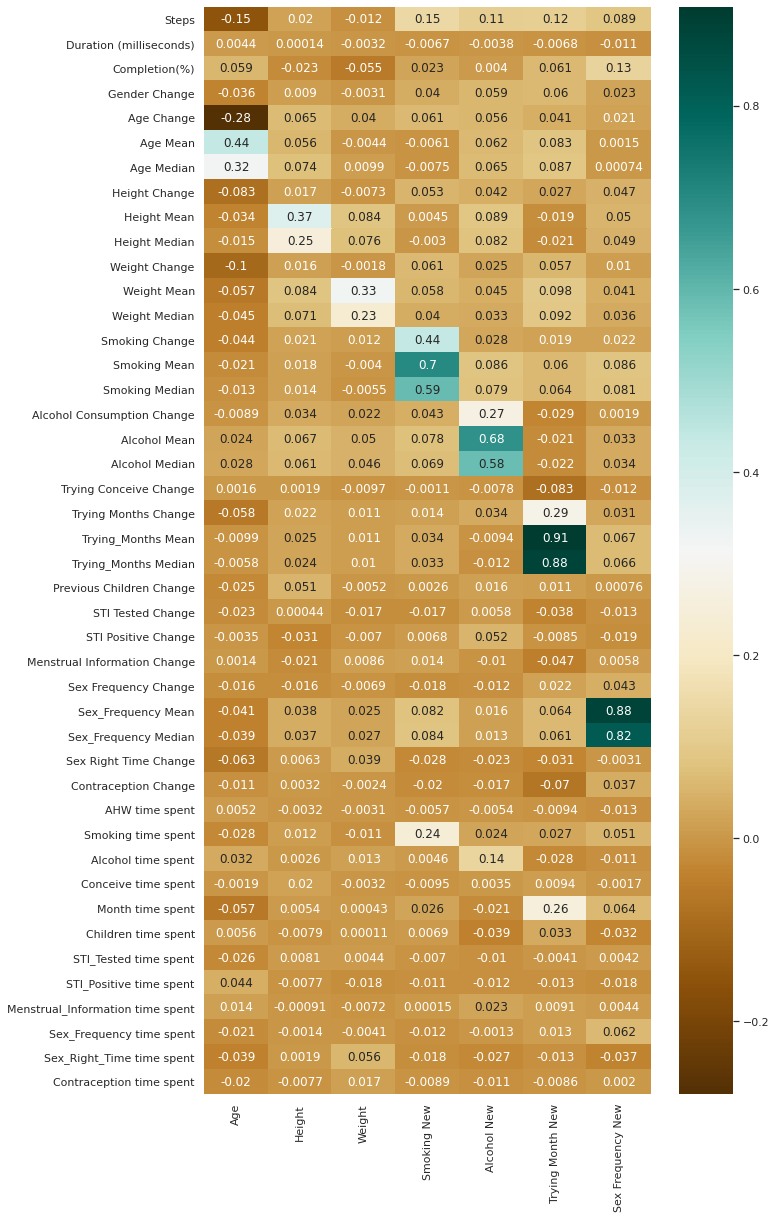

In [ ]:
#dfProfileFirst & dfGeneral
plt.figure(figsize=(10,20))
result= dfDataSet01b.corr()

result1 = result[['Age','Height','Weight',	'Smoking New',	'Alcohol New',	'Trying Month New', 
                  'Sex Frequency New']].loc[['Steps','Duration (milliseconds)', 'Completion(%)', 'Gender Change', 'Age Change',
               'Age Mean',	'Age Median',	'Height Change',	'Height Mean',	'Height Median',
               'Weight Change',	'Weight Mean',	'Weight Median',	'Smoking Change', 'Smoking Mean', 'Smoking Median',
               'Alcohol Consumption Change','Alcohol Mean', 'Alcohol Median',
               'Trying Conceive Change',	'Trying Months Change',	'Trying_Months Mean',	'Trying_Months Median',
               'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
               'Menstrual Information Change',	'Sex Frequency Change',	'Sex_Frequency Mean',	
               'Sex_Frequency Median',	'Sex Right Time Change',	'Contraception Change',	
               'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
               'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
               'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
               'Contraception time spent',
              #  'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
              #  'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y'
               ]]
sns.heatmap(result1,cmap="BrBG",annot=True)

In [ ]:
#Data set dfProfileLast & attribute
dfDataSet02 = pd.merge(dfProfileLast,dfGeneral, on = 'Visitor_ID', how = 'left')
dfDataSet02 = dfDataSet02.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'] )
dfDataSet02a = pd.merge(dfDataSet02,dfDiffFirstSecond[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff', 'Smoking Diff','Alcohol Diff',
                                                       'Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
dfDataSet02b = pd.merge(dfDataSet02a,dfDiffFirstLast[['Visitor_ID','Age Diff',	'Height Diff', 'Weight Diff', 'Smoking Diff','Alcohol Diff',
                                                      'Month Diff', 'Sex_Frequency Diff']], on = 'Visitor_ID', how = 'left')
#_x: first & second value; _y: first & last value
display(dfDataSet02b)

#dfDataSet02b[['Trying Months Change','Sex Frequency Change']].mode()

Visitor_ID Gender  ...  Month Diff_y  Sex_Frequency Diff_y
0     00052d764372f8e1    Men  ...           NaN                   NaN
1     0010038311a193ca  Women  ...           0.0                   0.0
2     001ad62ea7bffe81  Women  ...           0.0                   0.0
3     001f49b0bfe37865  Women  ...           0.0                   0.0
4     00274a3448b59cbd  Women  ...           0.0                   0.0
...                ...    ...  ...           ...                   ...
4125  ffbbfa8e0095fa45  Women  ...           0.0                 -12.0
4126  ffc980a4b6d372c6  Women  ...           0.0                   0.0
4127  ffcf6cfd8c6aac98  Women  ...           NaN                   NaN
4128  ffd1a676c10e1bcf  Women  ...           0.0                   0.0
4129  ffd318dc96254aab  Women  ...           0.0                   0.0

[4130 rows x 78 columns]

In [ ]:
from google.colab import drive
drive.mount('drive')
dfDataSet02b.to_csv('dfDataSetLastProfileForScatterPlot.csv')
!cp dfDataSetLastProfileForScatterPlot.csv "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/"


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efef379cbd0>]],
      dtype=object)

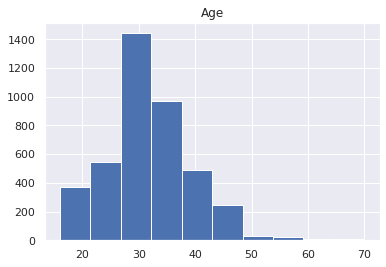

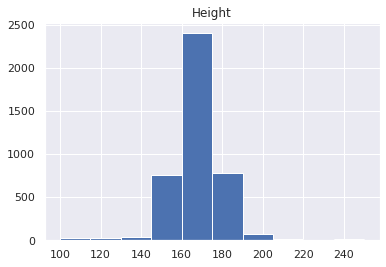

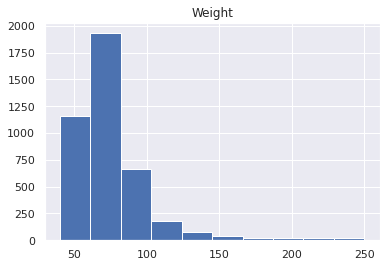

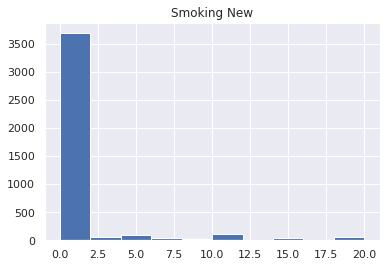

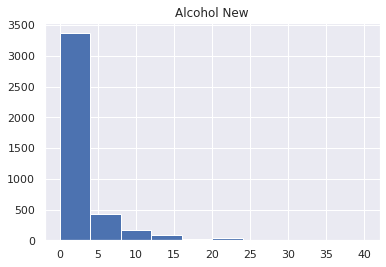

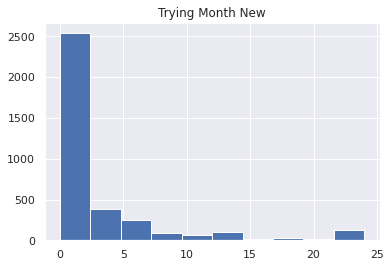

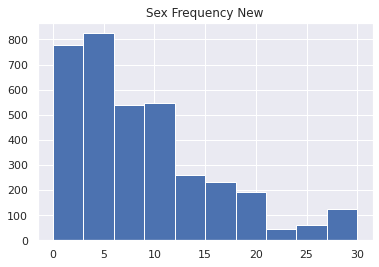

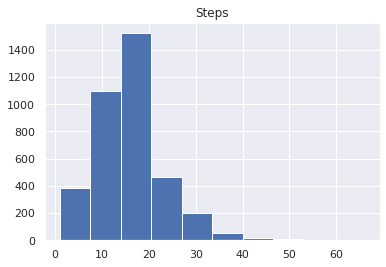

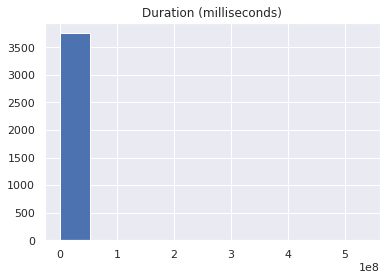

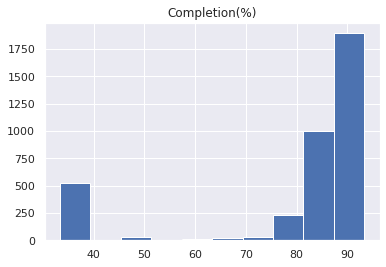

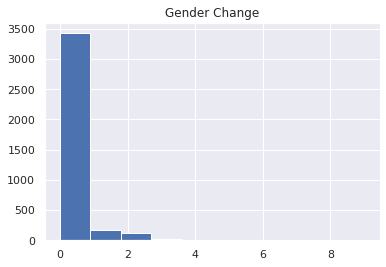

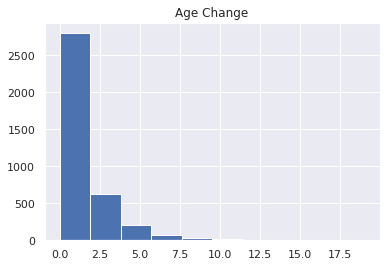

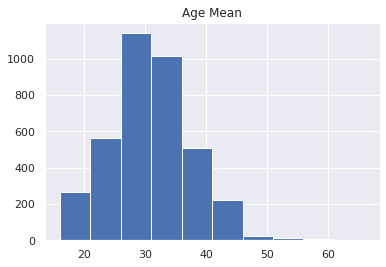

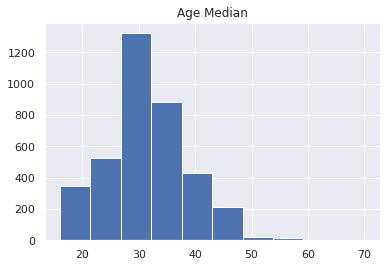

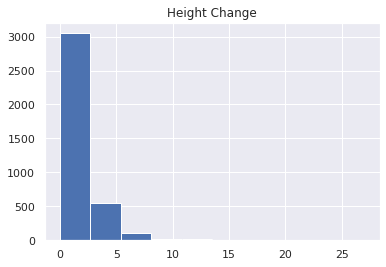

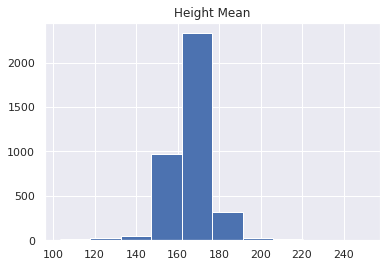

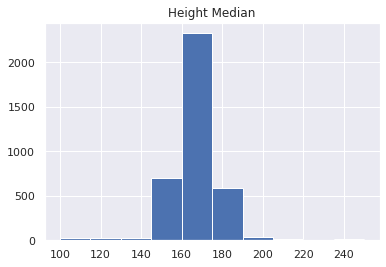

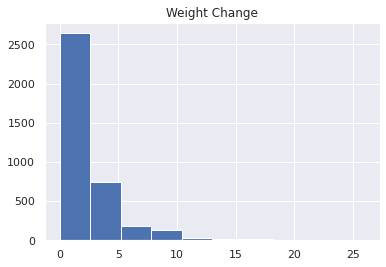

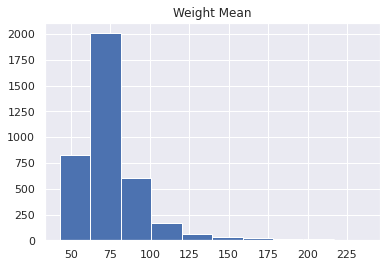

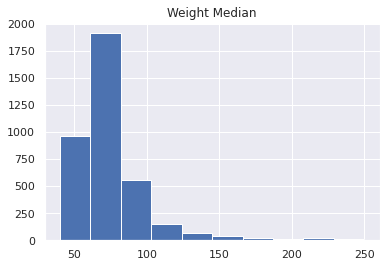

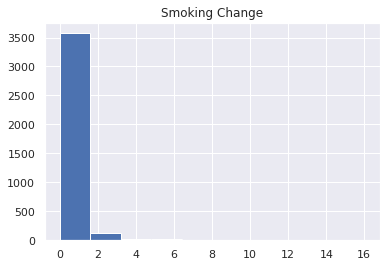

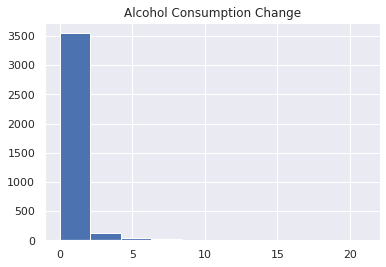

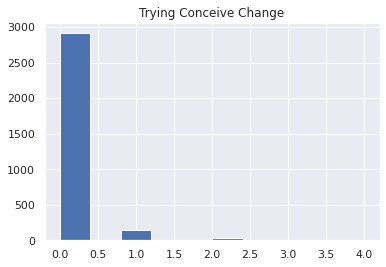

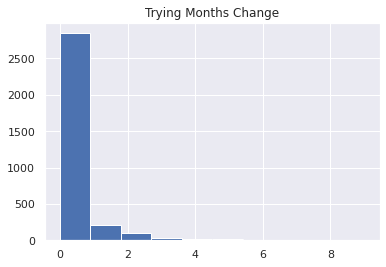

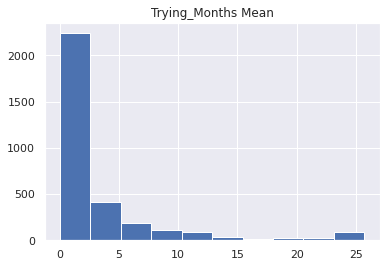

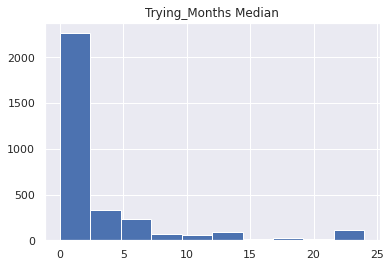

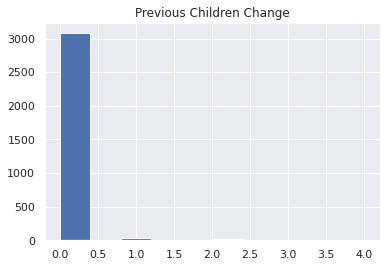

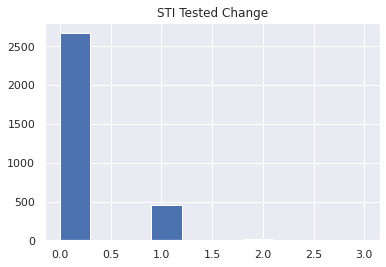

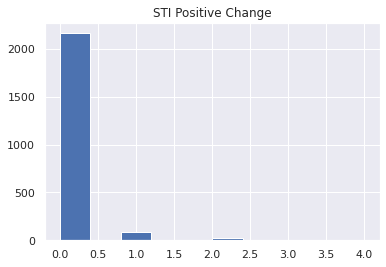

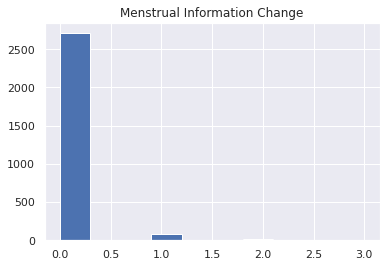

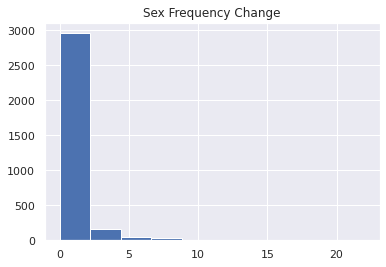

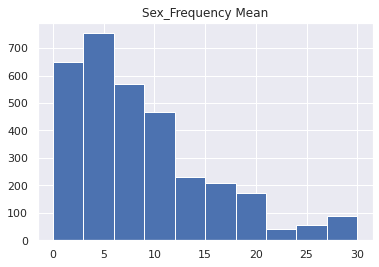

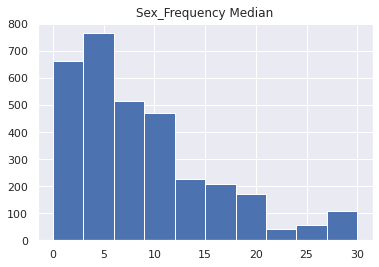

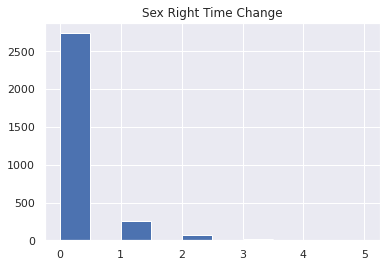

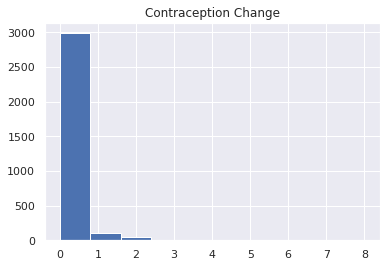

In [ ]:
my_data = dfDataSet02b[['Age']]
my_data.hist()
my_data = dfDataSet02b[['Height']]
my_data.hist()
my_data = dfDataSet02b[['Weight']]
my_data.hist()
my_data = dfDataSet02b[['Smoking New']]
my_data.hist()
my_data = dfDataSet02b[['Alcohol New']]
my_data.hist()
my_data = dfDataSet02b[['Trying Month New']]
my_data.hist()
my_data = dfDataSet02b[['Sex Frequency New']]
my_data.hist()
##

my_data = dfDataSet02b[['Steps']]
my_data.hist()
my_data = dfDataSet02b[['Duration (milliseconds)']]
my_data.hist()
my_data = dfDataSet02b[['Completion(%)']]
my_data.hist()
my_data = dfDataSet02b[['Gender Change']]
my_data.hist()
my_data = dfDataSet02b[['Age Change']]
my_data.hist()
my_data = dfDataSet02b[['Age Mean']]
my_data.hist()
my_data = dfDataSet02b[['Age Median']]
my_data.hist()
my_data = dfDataSet02b[['Height Change']]
my_data.hist()
my_data = dfDataSet02b[['Height Mean']]
my_data.hist()
my_data = dfDataSet02b[['Height Median']]
my_data.hist()
my_data = dfDataSet02b[['Weight Change']]
my_data.hist()
my_data = dfDataSet02b[['Weight Mean']]
my_data.hist()

my_data = dfDataSet02b[['Weight Median']]
my_data.hist()
my_data = dfDataSet02b[['Smoking Change']]
my_data.hist()
my_data = dfDataSet02b[['Alcohol Consumption Change']]
my_data.hist()
my_data = dfDataSet02b[['Trying Conceive Change']]
my_data.hist()
my_data = dfDataSet02b[['Trying Months Change']]
my_data.hist()
my_data = dfDataSet02b[['Trying_Months Mean']]
my_data.hist()
my_data = dfDataSet02b[['Trying_Months Median']]
my_data.hist()
my_data = dfDataSet02b[['Previous Children Change']]
my_data.hist()
my_data = dfDataSet02b[['STI Tested Change']]
my_data.hist()
my_data = dfDataSet02b[['STI Positive Change']]
my_data.hist()
my_data = dfDataSet02b[['Menstrual Information Change']]
my_data.hist()
my_data = dfDataSet02b[['Sex Frequency Change']]
my_data.hist()
my_data = dfDataSet02b[['Sex_Frequency Mean']]
my_data.hist()
my_data = dfDataSet02b[['Sex_Frequency Median']]
my_data.hist()
my_data = dfDataSet02b[['Sex Right Time Change']]
my_data.hist()
my_data = dfDataSet02b[['Contraception Change']]
my_data.hist()

In [ ]:
#from google.colab import drive
#drive.mount('drive')

#MeanMedian = dfDataSet02b[['Age', 'Height', 'Weight', 'Trying_Months', 'Sex_Frequency', 'Age Mean', 'Age Median', 'Height Mean', 'Height Median', 'Weight Mean', 'Weight Median',
#                           'Trying_Months Mean', 'Sex_Frequency Mean','Trying_Months Median', 'Sex_Frequency Median']]
#MeanMedian
#MeanMedian.to_csv('MeanMedian.csv')
#!cp MeanMedian.csv "/content/drive/MyDrive/05. STUDY/FLINDERS/2020-08 Masters Thesis/"

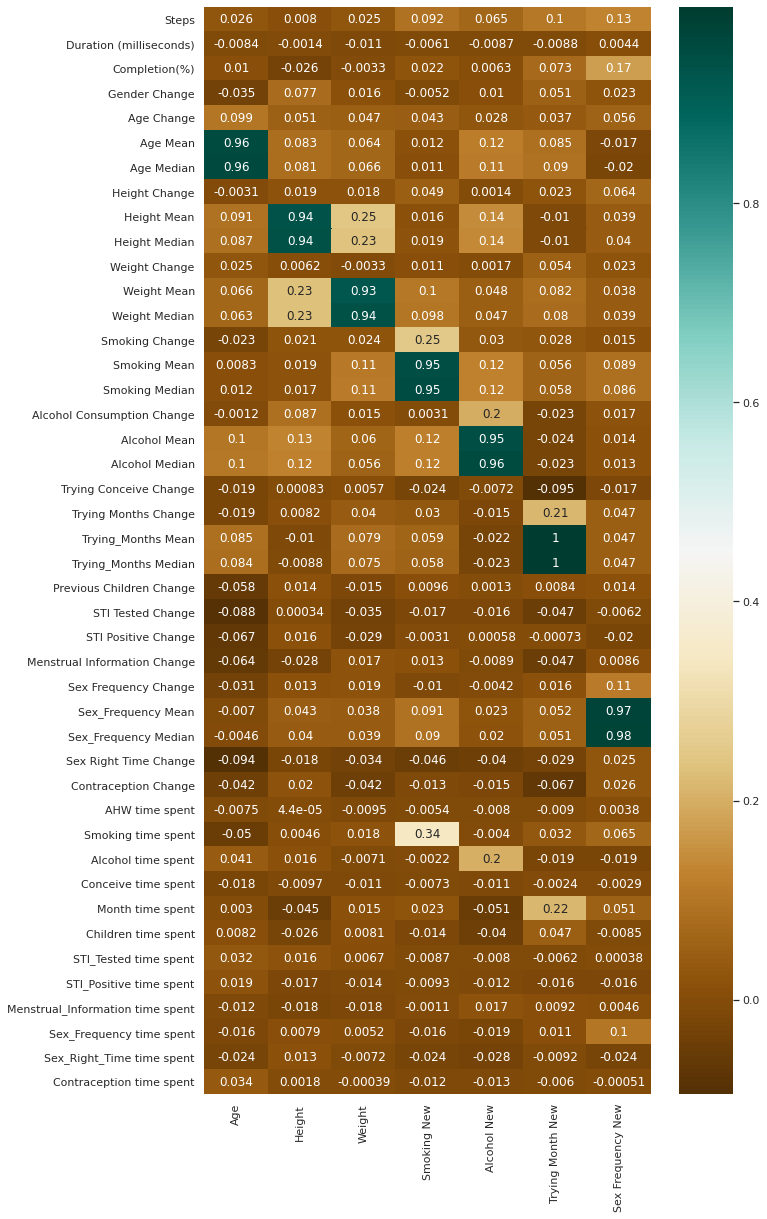

In [ ]:
#dfProfileLast & dfGeneral
plt.figure(figsize=(10,20))
resulta= dfDataSet02b.corr()
resultb = resulta[['Age','Height','Weight',	'Smoking New', 'Alcohol New',	'Trying Month New', 
                   'Sex Frequency New']].loc[['Steps','Duration (milliseconds)', 'Completion(%)', 'Gender Change', 'Age Change',
               'Age Mean',	'Age Median',	'Height Change',	'Height Mean',	'Height Median',
               'Weight Change',	'Weight Mean',	'Weight Median',	'Smoking Change', 'Smoking Mean', 'Smoking Median',
               'Alcohol Consumption Change','Alcohol Mean', 'Alcohol Median',
               'Trying Conceive Change',	'Trying Months Change',	'Trying_Months Mean',	'Trying_Months Median',
               'Previous Children Change',	'STI Tested Change',	'STI Positive Change',	
               'Menstrual Information Change',	'Sex Frequency Change',	'Sex_Frequency Mean',	
               'Sex_Frequency Median',	'Sex Right Time Change',	'Contraception Change',
               'AHW time spent','Smoking time spent','Alcohol time spent','Conceive time spent',
               'Month time spent','Children time spent','STI_Tested time spent','STI_Positive time spent',
               'Menstrual_Information time spent','Sex_Frequency time spent','Sex_Right_Time time spent',
               'Contraception time spent',
              #  'Age Diff_x','Height Diff_x', 'Weight Diff_x', 'Month Diff_x', 'Sex_Frequency Diff_x',
              #  'Age Diff_y', 'Height Diff_y', 'Weight Diff_y', 'Month Diff_y', 'Sex_Frequency Diff_y'
               ]]
sns.heatmap(resultb,cmap="BrBG",annot=True)

In [ ]:
pvalue = dfDataSet01b[['Age','Age Change','Trying Month New','Sex Frequency New', 'Trying_Months Mean',	
                       'Trying_Months Median',	'Sex_Frequency Mean', 'Sex_Frequency Median',	
               'Age Diff_x','Age Diff_y']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Age','Trying Month New','Sex Frequency New']].loc[[
                                                                      'Age Change','Trying_Months Mean','Trying_Months Median',	'Sex_Frequency Mean', 'Sex_Frequency Median',	
               'Age Diff_x','Age Diff_y']]

pvalue1.round(decimals=4)

Age  Trying Month New  Sex Frequency New
Age Change            0.0000            0.0193             0.2306
Trying_Months Mean    0.5749            0.0000             0.0001
Trying_Months Median  0.7417            0.0000             0.0002
Sex_Frequency Mean    0.0184            0.0003             0.0000
Sex_Frequency Median  0.0258            0.0005             0.0000
Age Diff_x            0.0000            0.0008             0.0058
Age Diff_y            0.0000            0.0002             0.0706

In [ ]:
pvalue = dfDataSet02b[['Age','Height','Weight','Trying Month New','Sex Frequency New',
               'Age Mean',	'Age Median',	'Height Mean',	'Height Median',
               'Weight Mean',	'Weight Median',	'Trying_Months Mean',	'Trying_Months Median',	
               'Sex_Frequency Mean', 'Sex_Frequency Median',	
               'Height Diff_y', 'Weight Diff_y']].corr(method=pearsonr_pval)
pvalue1 = pvalue[['Age','Height','Weight','Trying Month New','Sex Frequency New']].loc[['Age Mean',	'Age Median',	
                'Height Mean',	'Height Median',
               'Weight Mean',	'Weight Median',	'Trying_Months Mean',	'Trying_Months Median',	
               'Sex_Frequency Mean', 'Sex_Frequency Median',	
               'Height Diff_y', 'Weight Diff_y']]

pvalue1.round(decimals=4)

Age  Height  ...  Trying Month New  Sex Frequency New
Age Mean              0.0000  0.2460  ...            0.1069             0.0004
Age Median            0.0000  0.8949  ...            0.0326             0.0002
Height Mean           0.0219  0.0000  ...            0.2741             0.3777
Height Median         0.1867  0.0000  ...            0.6144             0.1753
Weight Mean           0.0056  0.0000  ...            0.0000             0.2052
Weight Median         0.0068  0.0000  ...            0.0000             0.1867
Trying_Months Mean    0.0819  0.1006  ...            0.0000             0.6904
Trying_Months Median  0.0790  0.1861  ...            0.0000             0.6555
Sex_Frequency Mean    0.0000  0.2279  ...            0.4915             0.0000
Sex_Frequency Median  0.0000  0.0260  ...            0.5842             0.0000
Height Diff_y         0.0687  0.0000  ...            0.2681             0.2976
Weight Diff_y         0.0013  0.0000  ...            0.0003             0.4092

[12 rows x 5 columns]